# Defining the Bioeconomy

For studying the sustainability transition of the Swedish Forest-based Bioeconomy, a definition of the bioeconomy is needed.

Previous research has struggled with defining the bioeconomy from a theoretical standpoint, instead providing ad-hoc operationalization for each research project.
These definitions usually depart from the central notion that a bioeconomy has at least something to do with the conversion of biomass for economic purposes.

Which sectors exactly are included in this depends on the research project.
For SWINNO, one previous definition exists.
In their working paper Cristina and Blaise use the following sectors to filter SWINNO for innovations:

|     Sectors                                       |     SNI Code                          |
|:---------------------------------------------------|---------------------------------------:|
|     Agriculture                                   |     011, 012, 12, 17, 18, 14,15,19    |
|     Chemical and Chemical products                |     24                                |
|     Construction                                  |     45                                |
|     Energy                                        |     10                                |
|     Engineering (machine and equipment)           |     29                                |
|     Forestry and logging                          |     20                                |
|     Fishery                                       |     050                               |
|     Food and beverages/tobacco                    |     15,16                             |
|     Health & Social Welfare- Pharmaceuticals,     |     85,                               |
|     Medical Equipment                             |     33                                |
|     Paper and paper products                      |     21                                | 

: Sector Codes Used in Chaminade and Bayuo

In addition, they use keywords to capture innovation outside the specified sector boundaries relating to the bioeconomy.
The keywords are: Biochemicals, Biofoods, Biofuel, Biogas, Biogenetic, Biological, Biomass, Biopharma, Bioplant, Biorefineries, Biotech, Biotechnology, Biomaterial, Biotextiles, Biodiversity, Co2, Carbondioxide, Climate, Ecological, Ecology, Environment, GMO, Greenhouse, Green, Food, Forest, Forestry, Fishing, Organic, Paper, Pulp, Renewable, Recycling, Recycle, Timber, Waste, Wood.

With this combination they find 560 innovations, which after manually checking for false positives is reduced to 360 innovations related to the bioeconomy by source or use.

I propose a slightly similar approach of combining sector codes of product origin and use with keywords.
However, I depart from the value chain of the forest based bioeconomy for my definition.
@wolfslehner2016ForestBioeconomyNew [17] illustrate the forest product value chain in @fig-forest_value_chain.

![Forest Sector Value Chain](../../assets/forest-sector-value-chain.png){#fig-forest_value_chain}.

For the classification this implies when capturing the bioeconomy, one must include the core forestry sectors.
In order to capture innovation outside, it is best to follow the products produces by the core sectors.
For this, one must first identify all, or at least the most relevant, final and intermediate products originating from forests.

## Different Sectors of the Forest Bioeconomy

An argument can be made that the core sectors of the forest bioeconomy are too restrictive based on the services includeed by the ecosystem forest.
The ecosystem service concept includes four services from which humans benefit: provisional, supporting, regulating and cultural.
Of those, provisional are the easiest to attribute and should, for the most part, be included in the sectors selected below.

|SNI Code | Description                            |
|--------:|:---------------------------------------|
|02       | Forestry and related services
|20       | Wood and wood product manufacturing except furniture
|21       | Pulp, paper and paper product manufacturing
|36       | Furniture manufacturing; other manufacturing

: Core Sectors of the Forest Bioeconomy

Possible extensions of these core sectors to other sectors involved in the bioeconomy are presented in @tbl-new_sectors, organized by the reason for their identification.

| Category           | Code | Industry                                                    |
|:----------------------|------:|:---------------------------------------------------------|
| Frequent in Literature                      | 17    | Textile manufacturing                             |
| Frequent in Literature                      | 19    | Tanning and dressing of leather; manufacture of luggage, handbags, and footwear |
| Frequent in Literature                      | 24    | Chemical and chemical product manufacturing |
| Frequent in Literature                      | 25    | Rubber and plastic product manufacturing |
| Frequent in Literature                      | 37    | Waste collection, treatment, and disposal activities; materials recovery |
| Frequent in Literature                      | 40    | Electricity, gas, steam, and hot water supply |
| Frequent in Literature                      | 45    | Construction|
| Cultural                   | 92    | Recreational, cultural, and sporting activities                   |
| Cultural                   | 93    | Other service activities                                                |
| Provisional              | 01    | Agriculture, hunting, and related services                           |
|Provisional | 0113 | Growing of fruit, berries, nuts, herbs etc |
|Provisional | 0150 | Hunting, game keeping and related services|
|Provisional | 1533 |Annan beredning och hållbarhetsbehandling av frukt, bär och grönsaker|
| Provisional              | 05    | Fishing, aquaculture, and related services                            |
| Provisional              | 15    | Food and beverage manufacturing                                     |
| Provisional              | 18    | Clothing and fur product manufacturing                         |

: Potential additional sectors {#tbl-new_sectors}

However, considering the high rate of false positives, keywords are needed to filter these sectors.
Due to the way the query is structured, it appears more prudent to omit the additional sectors and instead apply the keywords to the descriptions of all innovations in SWINNO.
Apart from being more parsimonious, this also improves the accuracy of the query as any innovation, regardless of their sectoral use or origin, that makes use of at least one forest based material should be included in the forest based bioeconomy.

The keywords are based on domain knowledge from literature and from experience of working with SWINNO:

    - "virke",
    - "cellulos",
    - "lignin",
    - "spån", 
    - "bark",
    - "levulinsyra" (Levulinic acid),
    - "furfural" (Furfural),
    - "svarttjära",
    - "svartlut",
    - "växtbas",
    - "ved",
    - "trä",
    - "skog",
    - "papper",
    - "biobränsle",
    - "biologiskt",
    - "nedbrytbar",
    - "papper",
    - "pappret",
    - "karton",
    - "tencel",

<!-- The following might be too coarse and yield too many false positives
    - "gren",
    - "kvist",
    - "grönmaterial",
    - "rot", 
    - "rött",
    - "stubb",
--->

The query is structure so that innovations are returned even if the keyword only matches part of a description, for example, a description of an innovation that makes use of träflis for energy will be included as trä is matched in träflis.

This list of keywords is not yet exhaustive and more effort is needed to ensure that the rate of false negatives is minimized. 

The possibility of false positives is not concerning at this stage as, during classification, innovations not outside the system boundaries are tagged as such for later exclusion.


<!-- include reindeer in keywords -- the issue is that "ren" is too frequently used with other words or has synonoms, alternatively one could filter for specific reindeer aspects "renkött", "renarana". A cursory exploration yielded no results.

benzoin is a resin that should also be included as a keyword -->

In [1]:
from IPython.display import display, Markdown

import pandas as pd
import numpy as np
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

from src.swinno_helpers import connect_swinno_db

swinno_db = connect_swinno_db()

# set all text on plots to be monospace with rcParams
plt.rcParams["font.family"] = "monospace"

In [2]:
def filter_years(df, min_year, max_year):
    df = df.dropna(subset=["year"])
    df = df[df["year"] != ""]
    df["year"] = df["year"].astype(int)
    df = df.query("year >= @min_year & year <= @max_year")

    return df

In [3]:
core = pd.read_sql_query(
    """
select
  i.sinno_id,
  i.innovation_name_in_swedish AS name,
  i.description_in_swedish AS description,
  i.additional_information_if_origin_new_scientific_discovery || i.additional_information_if_origin_new_technologies_or_materials || i.additional_info_if_origin_official_regulation_legislation_and_standards || i.additional_information_if_origin_solution_for_a_problem || i.additional_information_if_origin_performance || i.additional_information_if_origin_other AS info,
  i.year_of_commercialization AS year
from
  innovation i
  join use_sectors us on us.sinno_id = i.sinno_id
where
  us.use_sector like '02%'
  or us.use_sector like '20%'
  or us.use_sector like '21%'
  or us.use_sector like '36%'
  or product_code like '02%'
  or product_code like '20%'
  or product_code like '21%'
  or product_code like '36%';
""",
    swinno_db,
)

In [4]:
bioeconomy = pd.read_sql(
    """
select
  i.sinno_id,
  i.innovation_name_in_swedish AS name,
  i.description_in_swedish AS description,
  i.additional_information_if_origin_new_scientific_discovery || i.additional_information_if_origin_new_technologies_or_materials || i.additional_info_if_origin_official_regulation_legislation_and_standards || i.additional_information_if_origin_solution_for_a_problem || i.additional_information_if_origin_performance || i.additional_information_if_origin_other AS info,
  i.year_of_commercialization AS year,
  us.use_sector
from
  innovation i
  join use_sectors us on i.sinno_id = us.sinno_id
where
  (
    us.use_sector like '02%'
    or us.use_sector like '20%'
    or us.use_sector like '21%'
    or us.use_sector like '36%'
    or product_code like '02%'
    or product_code like '20%'
    or product_code like '21%'
    or product_code like '36%'
  )
  or (
    description like '%virke%'
    or description like '%cellulos%'
    or description like '%lignin%'
    or description like '%spån%'
    or description like '%bark%'
    or description like '%levulinsyra%'
    or description like '%furfural%'
    or description like '%svarttjära%'
    or description like '%svartlut%'
    or description like '%växtbas%'
    or description like '%ved%'
    or description like '%trä%'
    or description like '%skog%'
    or description like '%biobränsle%'
    or description like '%biologisk%'
    or description like '%nedbrytbar%'
    or description like '%papper%'
    or description like '%pappret%'
    or description like '%karton%'
    or description like '%tencel%'
  );
""",
    swinno_db,
)

In [5]:
count_core = len(core["sinno_id"].unique())
count_bioeconomy = len(bioeconomy["sinno_id"].unique())

display(
    Markdown(
        f"The number of innovations in the forest based bioeconomy sector as defined above is {count_bioeconomy}, with {count_core} innovations in the core sector. \
This means that at least {round(count_core /count_bioeconomy * 100, 2)}% of the innovations in the forest based bioeconomy stem from traditional forest sector activities. \
These values are based on uncleaned queries of SWINNO and may include false positives, especially the full bioeconomy query.      "
    )
)

The number of innovations in the forest based bioeconomy sector as defined above is 817, with 585 innovations in the core sector. This means that at least 71.6% of the innovations in the forest based bioeconomy stem from traditional forest sector activities. These values are based on uncleaned queries of SWINNO and may include false positives, especially the full bioeconomy query.      

In [6]:
sni_codes = pd.read_sql_query(
    """
select
*
from 
sni_codes
""",
    swinno_db,
)

sni_codes = sni_codes.rename(columns={"code": "use_sector"})

In [7]:
# | include: false


def plot_innovation_counts_by_sector(df, title):
    df = df.copy()
    df["sector"] = df["use_sector"].astype(str).str[:2]
    df = (
        df.groupby("sector")
        .nunique()["sinno_id"]
        .sort_values(ascending=False)
        .reset_index()
    )
    df = df.rename(columns={"sinno_id": "count"})
    df = df.join(sni_codes.set_index("use_sector"), on="sector", how="left")
    df = df[["count", "sector", "label"]]

    chart = (
        alt.Chart(df)
        .mark_bar()
        .encode(
            x=alt.X("count:Q", title="Number of innovations"),
            y=alt.Y("label:N", title="Sector", sort="-x"),
            tooltip=["count"],
        )
        .properties(title=title, width=900)
    )

    return chart


plot_innovation_counts_by_sector(bioeconomy, "Innovation counts by sector in SWINNO")

alt.Chart(...)

/tmp/ipykernel_25183/831579819.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(df["label"], linespacing=5)


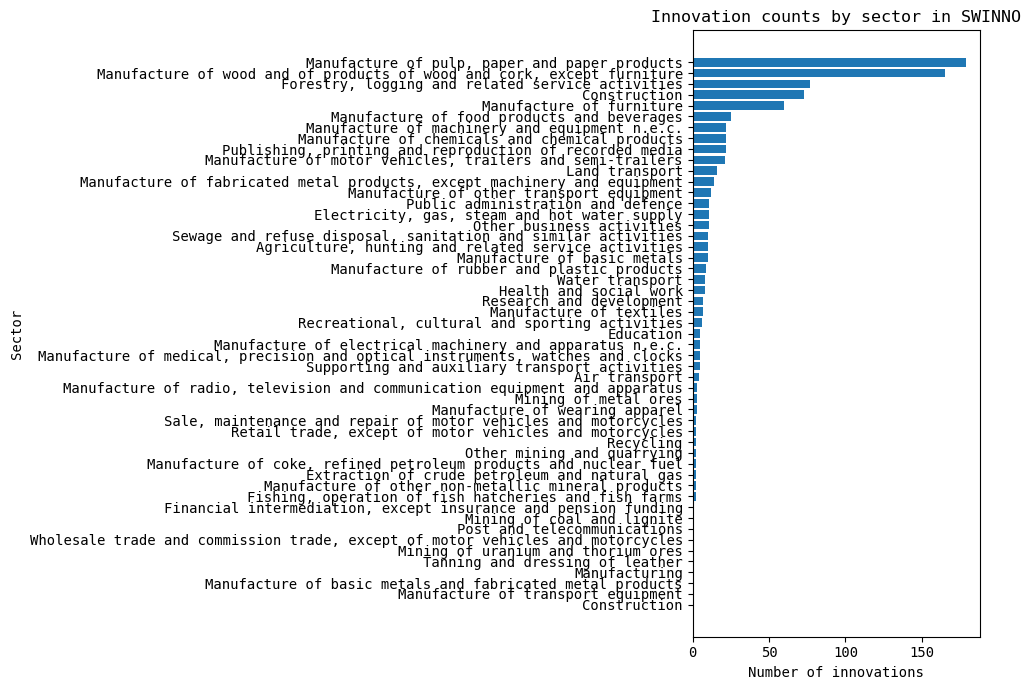

In [8]:
def plot_innovation_counts_by_sector(df, title):
    df = df.copy()
    df["sector"] = df["use_sector"].astype(str).str[:2]
    df = (
        df.groupby("sector")
        .nunique()["sinno_id"]
        .sort_values(ascending=False)
        .reset_index()
    )
    df = df.rename(columns={"sinno_id": "count"})
    df = df.join(sni_codes.set_index("use_sector"), on="sector", how="left")
    df = df[["count", "sector", "label"]]
    df = df.dropna(subset=["label"])
    df["label"] = df["label"].str.split(";").str[0]
    df["label"] = df["label"].str.split("|").str[0]

    fig, ax = plt.subplots(figsize=(10, 7), layout="tight")
    ax.barh(df["label"].astype(str), df["count"].astype(int), align="center")
    ax.set_xlabel("Number of innovations")
    ax.set_ylabel("Sector")
    ax.set_yticklabels(df["label"], linespacing=5)
    # increase the linehight for yaxis tick labels

    ax.set_title(title)
    ax.invert_yaxis()

    plt.show()


plot_innovation_counts_by_sector(bioeconomy, "Innovation counts by sector in SWINNO")

In [9]:
swinno = pd.read_sql_query(
    """
select sinno_id, year_of_commercialization as year, innovation_name_in_swedish as name
from innovation;
""",
    swinno_db,
)

In [10]:
swinno["bioeconomy"] = swinno["sinno_id"].isin(bioeconomy["sinno_id"].unique())

In [1]:
# | include: false


def plot_innovation_counts_by_year(df, title):
    df = df.copy()
    df = df[["sinno_id", "year", "bioeconomy"]]
    df = (
        df.groupby("year")
        .agg(
            total_count=("sinno_id", "nunique"), bioeconomy_count=("bioeconomy", "sum")
        )
        .reset_index()
    )
    df = pd.melt(
        df,
        id_vars=["year"],
        value_vars=["total_count", "bioeconomy_count"],
        var_name="type",
        value_name="count",
    )

    chart = (
        alt.Chart(df)
        .mark_line()
        .encode(
            x=alt.X("year:O", title="Year"),
            y=alt.Y("count:Q", title="Count of Total Innovations"),
            color=alt.Color("type:N", title="Type"),
            tooltip=["count", "year"],
        )
        .transform_filter(alt.datum.year >= 1970)
        .properties(title=title, width=900)
        .configure_title(font="Inconsolata")
        .configure_axis(labelFont="Inconsolata", titleFont="Inconsolata")
        .interactive()
    )

    return chart


plot_innovation_counts_by_year(swinno, "Innovation counts by year in SWINNO")

NameError: name 'swinno' is not defined

In [12]:
# | include: false


def calculate_bioeconomy_share(df):
    df = df.copy()
    df = df[["sinno_id", "year", "bioeconomy"]]
    df = (
        df.groupby("year")
        .agg(
            total_count=("sinno_id", "nunique"), bioeconomy_count=("bioeconomy", "sum")
        )
        .reset_index()
    )
    df["bioeconomy_share"] = df["bioeconomy_count"] / df["total_count"]

    return df


def plot_innovation_counts_by_year(df, title):
    df = calculate_bioeconomy_share(df)

    base = alt.Chart(df).encode(alt.X("year:O", axis=alt.Axis(title="Year")))

    count = (
        base.mark_line(color="red", opacity=0.6)
        .encode(
            alt.Y("bioeconomy_count:Q", title="Count of Bioeconomy Innovations"),
            tooltip=["bioeconomy_count", "bioeconomy_share", "year"],
        )
        .interactive()
    )

    share = (
        base.mark_line()
        .encode(
            alt.Y("bioeconomy_share:Q", title="Share of Bioeconomy Innovations"),
            tooltip=["bioeconomy_count", "bioeconomy_share", "year"],
        )
        .interactive()
    )

    chart = (
        alt.layer(count, share)
        .resolve_scale(y="independent")
        .properties(title=title, width=900)
        .configure_title(font="Inconsolata")
        .configure_axis(labelFont="Inconsolata", titleFont="Inconsolata")
    )

    return chart


plot_innovation_counts_by_year(swinno, "Innovation counts by year in SWINNO")

alt.LayerChart(...)

In [13]:
bio_share = calculate_bioeconomy_share(swinno)
bio_share = bio_share.dropna(subset=["year"])
bio_share = bio_share[bio_share["year"] != ""]
bio_share["year"] = bio_share["year"].astype(int)
bio_share.index = bio_share["year"]
bio_share = sm.add_constant(bio_share)

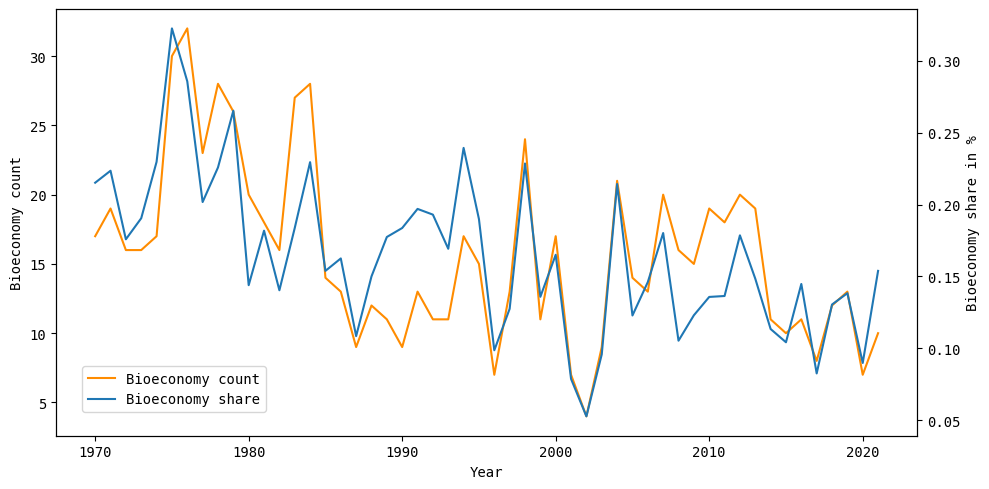

In [14]:
# | label: fig-bioeconomy_innovation_counts_shares

fig, axs = plt.subplots(1, 1, figsize=(10, 5), layout="tight")
axs.plot(bio_share["bioeconomy_count"], label="Bioeconomy count", color="darkorange")
axs.set_xlabel("Year")
axs.set_ylabel("Bioeconomy count")

axs2 = axs.twinx()
axs2.plot(bio_share["bioeconomy_share"], label="Bioeconomy share")
axs2.set_ylabel("Bioeconomy share in %")
# position legend inside bottom left corner
fig.legend(loc="lower left", bbox_to_anchor=(0.08, 0.15))
plt.show()

The plot @fig-bioeconomy_innovation_counts_shares suggests that the innovation rate for bioeconomy innovations closely follows the overall rate of innovations in Sweden.
Considering that it should be more difficult to get a high share if there are few innovations, the graph suggests that the 90s were a time in which more bioeconomy innovations were commercialized than in the years before and after.

From this chart it does not appear as if there was a sustained increase in bioeconomy innovations over the time period.
This might contradict the findings of Josef's environmental innovation study.

Still, a bioeconomy, which at its peak contributes almost 30% to the total innovation count of the country is substantial.
How does this look in different countries and using different metrics (patents)? 

<!-- TODO find benchmarks: countires and patents -->
<!-- TODO: check -->

<!-- TODO Is this correct? -->

In [15]:
# | include: false

alt.Chart(bio_share).mark_line(point=True).encode(
    alt.X("bioeconomy_count", scale=alt.Scale(domain=[0, 180])),
    alt.Y("total_count", scale=alt.Scale(domain=[0, 180])),
    order="year",
    tooltip=["bioeconomy_count", "total_count", "year"],
)

alt.Chart(...)

This chart suggests that there is no clear trend in improving the share of bioeconomy visions to total innovations.
Any improvment is quickly reversed.

<!-- What are the implications of it being non-stationary again? -->

In [16]:
def trend_change(series, hp_lambda, pct_corrector=100):
    """Takes time series data and returns the change of its HP Filter trend component.

    Args:
        series (pd.series): The time series data to be analyzed
        hp_lambda (int): Smoothing Lambda
        pct_corrector (int, optional): When run on different inputs (e.g. ln(GDP))it can be useful to correct to percentage. Defaults to 100.

    Returns:
        pd.series: The percentage change in the trend component.
    """

    _, trend = sm.tsa.filters.hpfilter(series, hp_lambda)

    trend_change = trend.diff(1).apply(lambda x: x * pct_corrector)

    return trend_change


def plot_trend_change(df, *, series: str, hp_lambda, **kwargs):
    """Plots the change in trend component of HP Filter

    Args:
        df (pd.DataFrame): A data frame containing a time series with data and dates.
        series (str): The name of the data column.
        hp_lambda (int): Smoothing Lambda
    """

    df = df.copy()

    df["func_trend"] = trend_change(df[series], hp_lambda)

    p = sns.lineplot(data=df, x="year", y="func_trend", **kwargs)
    p.set_ylabel(f"Change in Trend with $\lambda$ = {hp_lambda}")


def adf_test(timeseries, **kwargs):
    dftest = sm.tsa.adfuller(timeseries, **kwargs)
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    return dfoutput


def kpss_test(timeseries, **kwargs):
    dftest = sm.tsa.stattools.kpss(timeseries, **kwargs)
    dfoutput = pd.Series(
        dftest[0:3],
        index=["Test Statistic", "p-value", "#Lags Used"],
    )
    for key, value in dftest[3].items():
        dfoutput["Critical Value (%s)" % key] = value
    return dfoutput

Dickey Fuller Unit Root Test

The null-hypothesis is that the time series is non-stationary.

In [17]:
adf_test(bio_share["bioeconomy_count"])

Test Statistic                 -3.528113
p-value                         0.007294
#Lags Used                      0.000000
Number of Observations Used    51.000000
Critical Value (1%)            -3.565624
Critical Value (5%)            -2.920142
Critical Value (10%)           -2.598015
dtype: float64

For the bioeconomy count per year, the null-hypothesis cannot be rejected.
Indicating that the time series is non-stationary.
This means that any timeseries analysis needs to carefully deal with the stationarity.

Could diff, the series or log it.

In [18]:
eps = 1e-10  # to avoid log(0)
bio_share["ln_bioeconomy_count"] = np.log(bio_share["bioeconomy_count"] + eps)
bio_share["diff_bioeconomy_count"] = bio_share["bioeconomy_count"].diff(1)
bio_share["diff_bioeconomy_share"] = bio_share["bioeconomy_share"].diff(1)


for col in ["diff_bioeconomy_count", "ln_bioeconomy_count", "diff_bioeconomy_share"]:
    df = bio_share.copy()
    if col != "ln_bioeconomy_count":
        df = df.dropna(subset=[col])
    print(col)
    print(adf_test(df[col]))
    print("+" * 20)
    print("KPSS")
    print(kpss_test(df[col]))
    print("\n")

diff_bioeconomy_count
Test Statistic                -7.781034e+00
p-value                        8.416429e-12
#Lags Used                     1.000000e+00
Number of Observations Used    4.900000e+01
Critical Value (1%)           -3.571472e+00
Critical Value (5%)           -2.922629e+00
Critical Value (10%)          -2.599336e+00
dtype: float64
++++++++++++++++++++
KPSS
Test Statistic            0.500000
p-value                   0.041667
#Lags Used               50.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


ln_bioeconomy_count
Test Statistic                 -1.591159
p-value                         0.488033
#Lags Used                      4.000000
Number of Observations Used    47.000000
Critical Value (1%)            -3.577848
Critical Value (5%)            -2.925338
Critical Value (10%)           -2.600774
dtype: float64
++++++++++++++++++++
KPSS
Test Statistic     

/home/pjk/miniconda3/envs/swinno-shades-green/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


Diffing the count series produces a nice and stationary series.

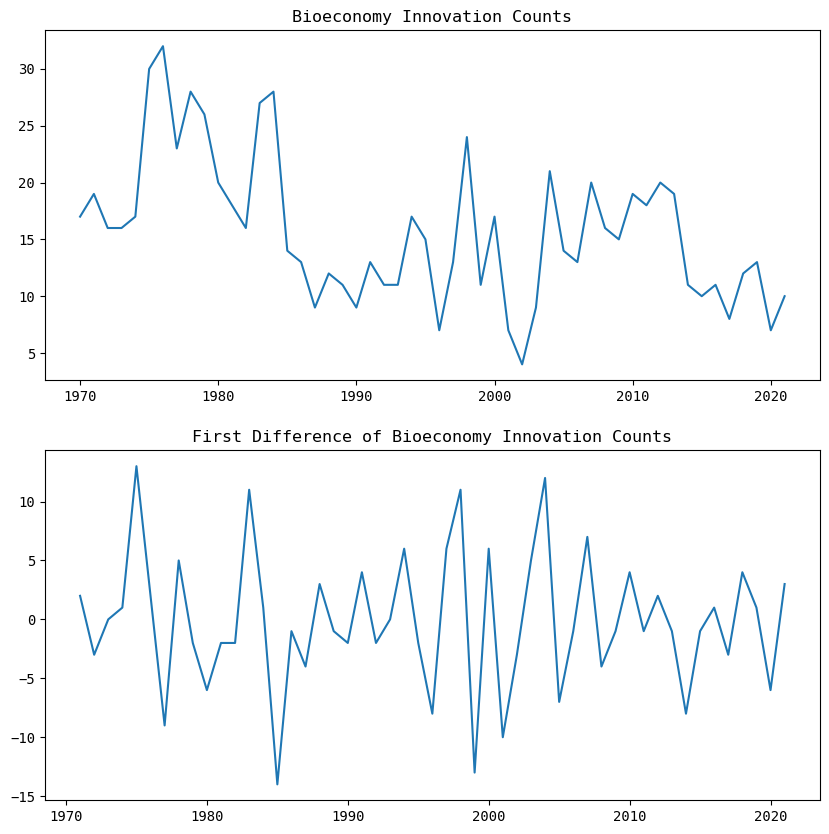

In [19]:
# set up a three subplot figure
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
axes[0].set_title("Bioeconomy Innovation Counts")
axes[1].set_title("First Difference of Bioeconomy Innovation Counts")

axes[0].plot(bio_share["bioeconomy_count"])
axes[1].plot(bio_share["diff_bioeconomy_count"])

In [20]:
bio_share["trend_change"] = trend_change(bio_share["bioeconomy_count"], 100)
bio_share["trend_change_share"] = trend_change(bio_share["bioeconomy_share"], 100)

bio_share["diff_trend_change"] = trend_change(
    bio_share["diff_bioeconomy_count"].dropna(), 100
)
bio_share["diff_trend_change_share"] = trend_change(
    bio_share["diff_bioeconomy_share"].dropna(), 100
)


bio_share.head()

,const,year,total_count,bioeconomy_count,bioeconomy_share,ln_bioeconomy_count,diff_bioeconomy_count,diff_bioeconomy_share,trend_change,trend_change_share,diff_trend_change,diff_trend_change_share
year,,,,,,,,,,,,
1970,1.0,1970,79,17,0.215190,2.833213,NaN,NaN,NaN,NaN,NaN,NaN
1971,1.0,1971,85,19,0.223529,2.944439,2.0,0.008340,110.493194,0.261003,NaN,NaN
1972,1.0,1972,91,16,0.175824,2.772589,-3.0,-0.047705,109.884172,0.256696,-7.623878,-0.053918
1973,1.0,1973,84,16,0.190476,2.772589,0.0,0.014652,108.952172,0.249506,-6.997806,-0.050091
1974,1.0,1974,74,17,0.229730,2.833213,1.0,0.039254,103.884399,0.190584,-10.043351,-0.094115


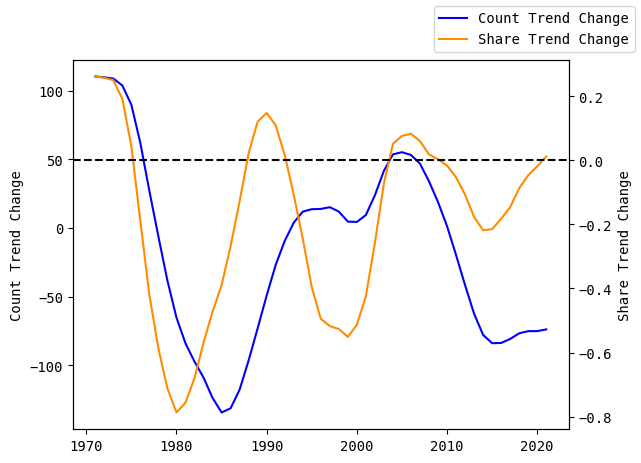

In [21]:
fig, ax1 = plt.subplots()

ax1.set_ylabel("Count Trend Change")
ax1.plot(bio_share["trend_change"], color="blue")
ax1.tick_params(axis="y")

ax2 = ax1.twinx()
ax2.set_ylabel("Share Trend Change")
ax2.plot(bio_share["trend_change_share"], color="darkorange")
ax2.tick_params(axis="y")
ax2.axhline(y=0, color="k", linestyle="--")
fig.legend(["Count Trend Change", "Share Trend Change"])
plt.show()

Does this mean that bioeconomy innovations lost in importance (measured as share of total innovation) between 1975 and 1987?
And that it is only in very limited periods performing better relative to the total NIS?

The HP filter suggests two clear humps in the count of bioeconomy innovations.
Their peaks appear to be roughly 30 years apart, with the first being much larger than the second.
There appears to be no change in the trend of the bioeconomy share.
This suggests that any trend in the absolute count of bioeconomy innovations is driven by the trends in the NIS, rather than by trends in the SIS (Sectoral Innovation System).

## Detrending using OLS

In [22]:
ols_count = sm.OLS(bio_share["bioeconomy_count"], bio_share.index).fit()
ols_share = sm.OLS(bio_share["bioeconomy_share"], bio_share.index).fit()
ols_diff_share = sm.OLS(
    bio_share["diff_bioeconomy_share"], bio_share.index, missing="drop"
).fit()
ols_diff_count = sm.OLS(
    bio_share["diff_bioeconomy_count"], bio_share.index, missing="drop"
).fit()

In [23]:
def plot_ols_detrend(ols_results, data, twinx=True, ax=None):
    xb = ols_results.fittedvalues
    res = ols_results.resid
    if not len(xb) == len(data):
        data = data[1:]
    X = data["year"]

    # If no axes are provided, create a new one
    if ax is None:
        fig, ax = plt.subplots()

    ax.set_ylabel("Trend")
    ax.set_xlabel("Year")
    ax.plot(X, xb)

    if not twinx:
        ax.plot(X, res)
        ax.legend(["Trend", "Change in Trend"])
    else:
        ax2 = ax.twinx()
        ax2.set_ylabel("Change in Trend")
        ax2.plot(X, res)
        ax.legend(["Trend"])

    # If a new figure was created, return it
    if ax is None:
        return fig


def fig_ols_detrend(regression_1, regression_2, data, figtitle=None, **kwargs):
    fig, axes = plt.subplots(1, 2, figsize=(7, 5), layout="tight")

    plot_ols_detrend(regression_1, bio_share, ax=axes[0], **kwargs)
    plot_ols_detrend(regression_2, bio_share, ax=axes[1], **kwargs)
    axes[0].set_title("OLS Detrended Count")
    axes[0].set_ylim([-25, 25])
    axes[1].set_ylim([-0.25, 0.25])
    axes[1].set_title("OLS Detrended Share in %")
    axes[1].legend()

    # Show the plot
    out = fig
    return fig

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


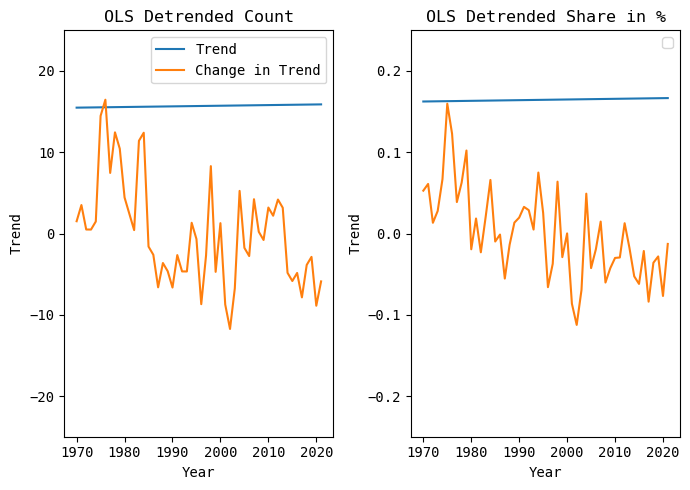

In [32]:
# | label: bioeconomy_ols_detrend
fig_ols_detrend(
    ols_count,
    ols_share,
    bio_share,
    twinx=False,
)

In [25]:
display(
    Markdown(
        f"Detrending using OLS suggests that the share of bioeconomy innovations has increased by only {(ols_share.fittedvalues.max()-ols_share.fittedvalues.min()):.2%} between 1970 and 2010."
    )
)

Detrending using OLS suggests that the share of bioeconomy innovations has increased by only 0.42% between 1970 and 2010.

The plot in @fig-bioeconomy_ols_detrend shows nicely the non-stationarity of the time series. A

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


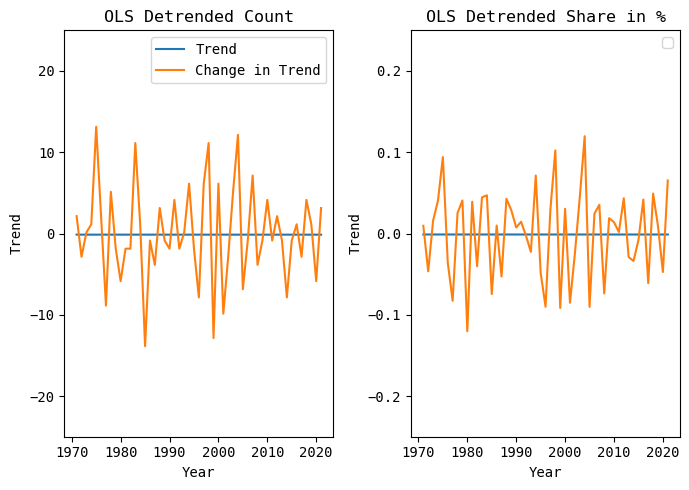

In [33]:
fig_ols_detrend(
    ols_diff_count,
    ols_diff_share,
    bio_share[["year", "diff_bioeconomy_share"]],
    twinx=False,
)

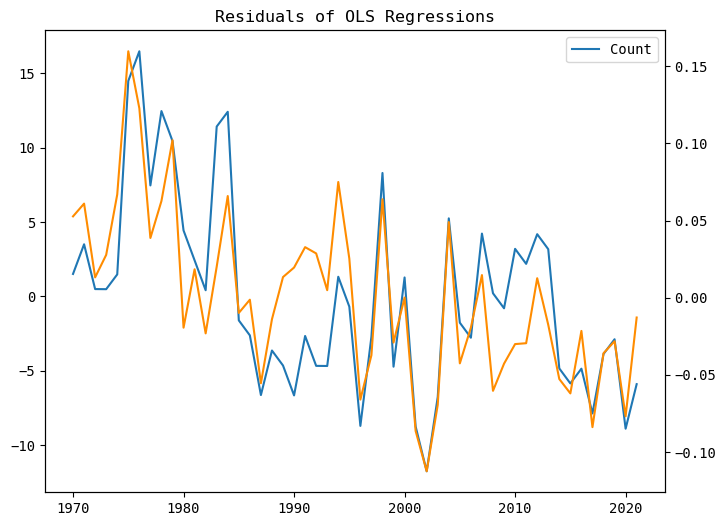

In [27]:
# Calculate the residuals for both regressions
res_count = ols_count.resid
res_share = ols_share.resid

# Create a figure and an axis object
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the residuals of the two regressions on the same axis
ax.plot(bio_share["year"], res_count, label="Count")

ax2 = ax.twinx()
ax2.plot(bio_share["year"], res_share, color="darkorange", label="Share")


# Add a title and legend to the plot
ax.set_title("Residuals of OLS Regressions")
ax.legend()

# Show the plot
plt.show()

In [28]:
diffed_ols_count = sm.OLS(
    bio_share["diff_bioeconomy_count"],
    bio_share["diff_bioeconomy_count"].shift(1),
    missing="drop",
).fit()
diffed_ols_count.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     diff_bioeconomy_count   R-squared (uncentered):                   0.047
Model:                               OLS   Adj. R-squared (uncentered):              0.027
Method:                    Least Squares   F-statistic:                              2.397
Date:                   Wed, 12 Jul 2023   Prob (F-statistic):                       0.128
Time:                           15:44:32   Log-Likelihood:                         -158.28
No. Observations:                     50   AIC:                                      318.6
Df Residuals:                         49   BIC:                                      320.5
Df Model:                              1                                                  
Covariance Type:               nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
diff_bioeconomy_count    -0.2163      0.140     -1.548      0.128      -0.497       0.064
==============================================================================
Omnibus:                        1.428   Durbin-Watson:                   2.146
Prob(Omnibus):                  0.490   Jarque-Bera (JB):                0.756
Skew:                           0.267   Prob(JB):                        0.685
Kurtosis:                       3.280   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Running the AR model with yearly counts reveals no autoregressive moment in the first difference of the bioeconomy time series.

In [29]:
bio_share_rolling = bio_share.rolling(5).mean().dropna()

<AxesSubplot: xlabel='year'>

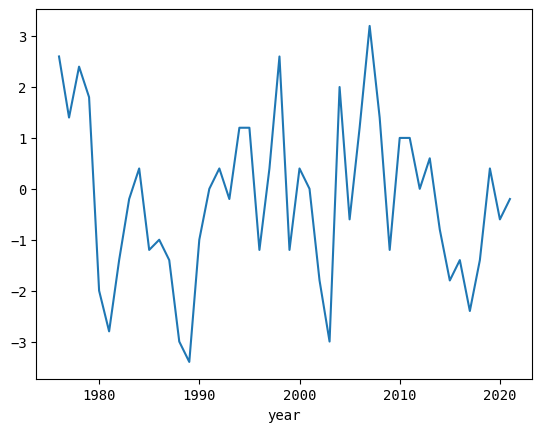

In [30]:
bio_share_rolling["diff_bioeconomy_count"].plot()

In [31]:
diffed_rolling_ols_count = sm.OLS(
    bio_share_rolling["diff_bioeconomy_count"],
    bio_share_rolling[["diff_bioeconomy_count", "const"]].shift(1),
    missing="drop",
).fit()

diffed_rolling_ols_count.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     diff_bioeconomy_count   R-squared:                       0.158
Model:                               OLS   Adj. R-squared:                  0.139
Method:                    Least Squares   F-statistic:                     8.097
Date:                   Wed, 12 Jul 2023   Prob (F-statistic):            0.00677
Time:                           15:44:33   Log-Likelihood:                -79.837
No. Observations:                     45   AIC:                             163.7
Df Residuals:                         43   BIC:                             167.3
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
diff_bioeconomy_count     0.3841      0.135      2.846      0.007       0.112       0.656
const                    -0.1909      0.219     -0.870      0.389      -0.633       0.251
==============================================================================
Omnibus:                        0.842   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.657   Jarque-Bera (JB):                0.897
Skew:                           0.206   Prob(JB):                        0.639
Kurtosis:                       2.445   Cond. No.                         1.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""